In [6]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
from scipy.stats import beta


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


##Gamma Distribution

The Gamma distribution is a continuous probability distribution that is typically used to model the time until an event occurs. The PDF is defined as:

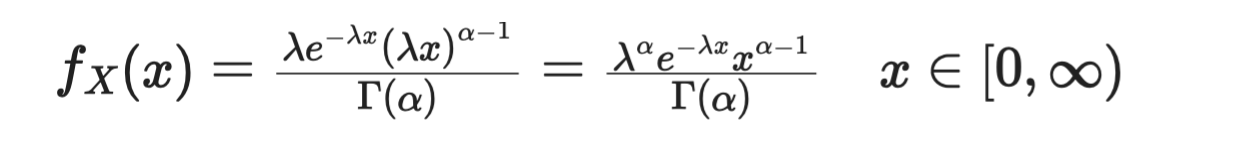

where;

- f (x) represents the probability density function of the random variable.

- λ is the rate parameter

- 𝐞 is the base of the natural logarithm (approx 2.71828)

- 𝖷 is the specific value at which you want to evaluate the probability density.

- α is the shape parameter of the distribution

- T(α) represents the gamma function


The probability density function can be written in two equivalent forms, both representing the same distribution, just in different mathematical formulations:







> 1 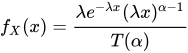

 > 2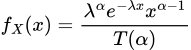

In both forms, the function fX(x) represents the probability of the random variable X taking a value around x when the parameters lambda (rate) and alpha (shape) are set. X ranges from 0 to infinity x ϵ [0,∞) i.e non-negative. The gamma function is defined as;


>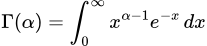


The gamma function above T(α) ensures that the probability density function integrates to 1 over its entire range and is dependent on the shape parameter  α to normalize the distribution.

>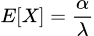

The variance of the random variable Y is given by:

>lagrida_latex_editor-6.png

The standard deviation (σ) is the square root of the variance:

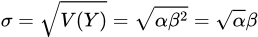

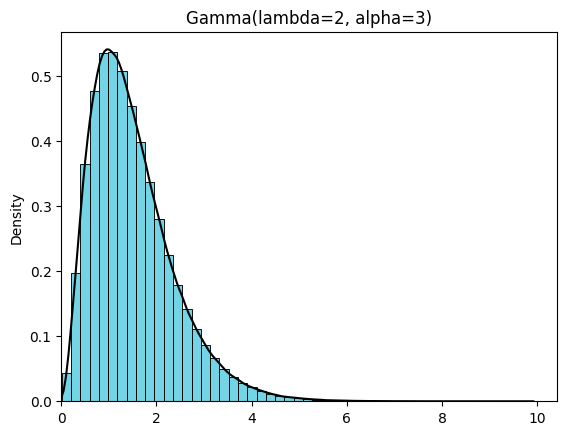

In [ ]:
np.random.seed(1)
N = 1000000
lam = 2
alpha = 3

gam_data = np.random.gamma(shape = alpha, scale = 1/lam, size = N)

sns.histplot(gam_data, color='#43C6DB', stat='density', bins=50)
sns.kdeplot(gam_data, color='black')
plt.xlim(left = 0)
plt.title(f'Gamma(lambda={lam}, alpha={alpha})');

In [ ]:
lam = 2
alpha = 3
print(f'The mean of the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', np.round(gamma.mean(a = alpha, scale = 1/lam), 4))
print(f'The median of the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', np.round(gamma.median(a = alpha, scale = 1/lam), 4))
print(f'The variance of the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', np.round(gamma.var(a = alpha, scale = 1/lam), 4))
print(f'The standard deviation of the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', np.round(gamma.std(a = alpha, scale = 1/lam), 4))
print(f'The skewness of the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', np.round(gamma.stats(a = alpha, scale = 1/lam, moments='mvsk')[2], 4))
print(f'The kurtosis of the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', np.round(gamma.stats(a = alpha, scale = 1/lam, moments='mvsk')[3], 4))

The mean of the Gamma(lambda=2, alpha=3) Distribution is:  1.5
The median of the Gamma(lambda=2, alpha=3) Distribution is:  1.337
The variance of the Gamma(lambda=2, alpha=3) Distribution is:  0.75
The standard deviation of the Gamma(lambda=2, alpha=3) Distribution is:  0.866
The skewness of the Gamma(lambda=2, alpha=3) Distribution is:  1.1547
The kurtosis of the Gamma(lambda=2, alpha=3) Distribution is:  2.0


In [ ]:
#Fit a gamma distribution to the data and get the parameters
params = gamma.fit(gam_data)

print('alpha = ', params[0], ',', 'lambda = ', 1/params[2], ',', 'loc = ', params[1])

alpha =  3.005673983826208 , lambda =  2.0039285150046418 , loc =  -0.0002511581156009133


The distribution curve  depends on α and λ, where  higher alpha values result in a more skewed distribution, influencing tail behaviour and a larger λ "stretches" the distribution

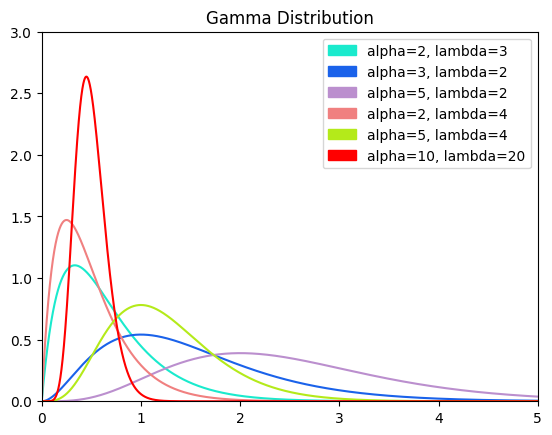

In [ ]:
np.random.seed(1)
N = 100000
x = np.linspace(0, 5, N)
alpha1, alpha2, alpha3, alpha4, alpha5, alpha6 = [2, 3, 5, 2, 5, 10]
lam1, lam2, lam3, lam4, lam5, lam6 = [3, 2, 2, 4, 4, 20]

gam_data1 = gamma.pdf(x, a = alpha1, scale = 1/lam1)
gam_data2 = gamma.pdf(x, a = alpha2, scale = 1/lam2)
gam_data3 = gamma.pdf(x, a = alpha3, scale = 1/lam3)
gam_data4 = gamma.pdf(x, a = alpha4, scale = 1/lam4)
gam_data5 = gamma.pdf(x, a = alpha5, scale = 1/lam5)
gam_data6 = gamma.pdf(x, a = alpha6, scale = 1/lam6)

plt.plot(x, gam_data1, color='#1AEACD')
plt.plot(x, gam_data2, color='#1A62EA')
plt.plot(x, gam_data3, color='#BB8FCE')
plt.plot(x, gam_data4, color='LightCoral')
plt.plot(x, gam_data5, color='#B4EA1A')
plt.plot(x, gam_data6, color='r')

patch1 = mpatches.Patch(color='#1AEACD', label=f'alpha={alpha1}, lambda={lam1}')
patch2 = mpatches.Patch(color='#1A62EA', label=f'alpha={alpha2}, lambda={lam2}')
patch3 = mpatches.Patch(color='#BB8FCE', label=f'alpha={alpha3}, lambda={lam3}')
patch4 = mpatches.Patch(color='LightCoral', label=f'alpha={alpha4}, lambda={lam4}')
patch5 = mpatches.Patch(color='#B4EA1A', label=f'alpha={alpha5}, lambda={lam5}')
patch6 = mpatches.Patch(color='r', label=f'alpha={alpha6}, lambda={lam6}')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], frameon=True);
plt.xlim(0, 5)
plt.ylim(0, 3)
plt.title('Gamma Distribution');

Integration of the pdf gives us the CDF, which as you may know, maps values to their percentile rank in a distribution

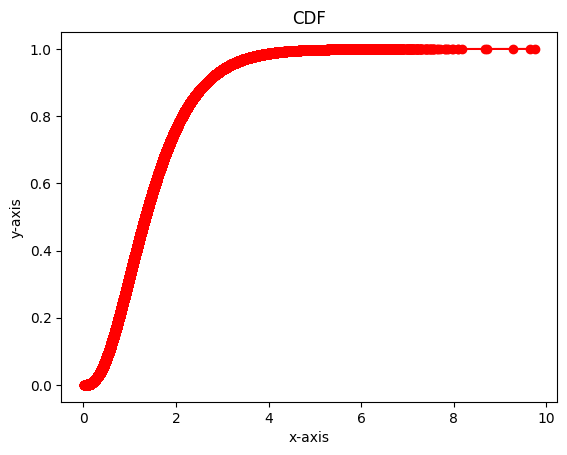

In [ ]:
x = np.sort(gam_data)
N = 1000000
#Get the cdf values of y
y = np.arange(N) / float(N)

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o');

To find a point that has a right probability of
 use the code below:

` gamma.isf(p, a, scale) `

To find a point that has a left probability of
 use the code below:

` gamma.isf(1-p, a, scale) `

In [ ]:
p = 0.9
alpha = 3
lam = 2
print(f'The point in the Gamma(lambda={lam}, alpha={alpha}) Distribution that has a right probability of *{p}*: ', gamma.isf(p, a = alpha, scale = 1/lam))
print(f'The point in the Gamma(lambda={lam}, alpha={alpha}) Distribution that has a left probability of *{p}*: ', gamma.isf(1-p, a = alpha, scale = 1/lam))


The point in the Gamma(lambda=2, alpha=3) Distribution that has a right probability of *0.9*:  0.5510326641246606
The point in the Gamma(lambda=2, alpha=3) Distribution that has a left probability of *0.9*:  2.661160168917105


The point in the Gamma(lambda=2, alpha=3) Distribution that has a right probability of *0.9*:  0.5510326641246606
The point in the Gamma(lambda=2, alpha=3) Distribution that has a left probability of *0.9*:  2.661160168917105
To find the left probability of a point use the code below:

` gamma.cdf(X, a, scale) `

To find the right probability of a point use the code below:

` gamma.sf(X, a, scale) `

In [ ]:
X = 1
alpha = 3
lam = 2
print(f'The left probability of *{X}* in the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', gamma.cdf(X, a = alpha, scale = 1/lam))
print(f'The Right probability of *{X}* in the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', gamma.sf(X, a = alpha, scale = 1/lam))


The left probability of *1* in the Gamma(lambda=2, alpha=3) Distribution is:  0.32332358381693654
The Right probability of *1* in the Gamma(lambda=2, alpha=3) Distribution is:  0.6766764161830634


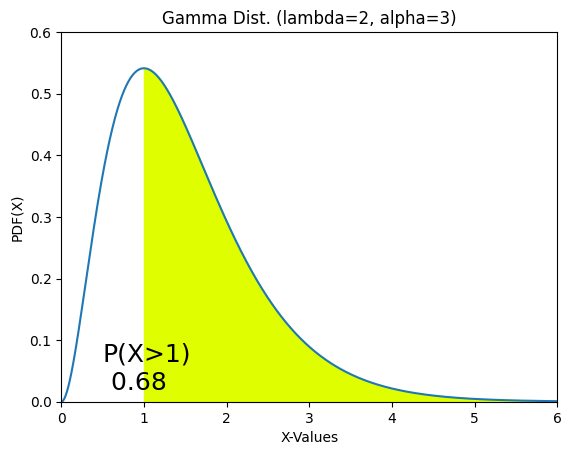

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 6, 0.001)
ax.plot(x, gamma.pdf(x, a = alpha, scale = 1/lam))
ax.set_title(f'Gamma Dist. (lambda={lam}, alpha={alpha})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(X, 6, 0.001)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 6)
ax.fill_between(px, gamma.pdf(px, a = alpha, scale = 1/lam), color='#DFFF00')

prob = gamma.sf(X, a = alpha, scale = 1/lam)
ax.text(0.5, 0.02, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);


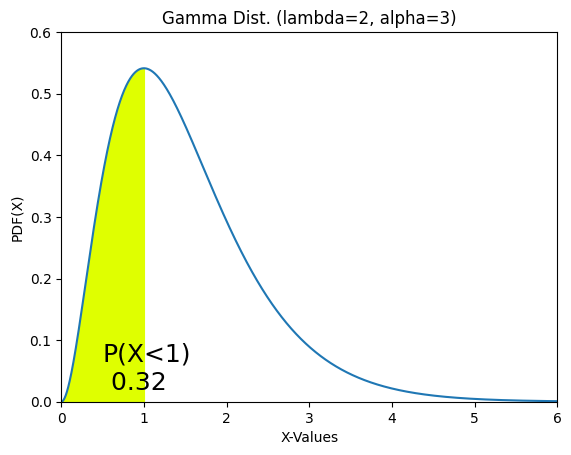

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 6, 0.001)
ax.plot(x, gamma.pdf(x, a = alpha, scale = 1/lam))
ax.set_title(f'Gamma Dist. (lambda={lam}, alpha={alpha})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(0, X, 0.001)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 6)
ax.fill_between(px, gamma.pdf(px, a = alpha, scale = 1/lam), color='#DFFF00')

prob = gamma.cdf(X, a = alpha, scale = 1/lam)
ax.text(0.5, 0.02, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points use the code below:

` gamma.cdf(Y, a, scale) - gamma.cdf(X, a, scale) `

In [ ]:
X = 1
Y = 3
alpha = 3
lam = 2
print(f'The probability between *({X}, {Y})* in the Gamma(lambda={lam}, alpha={alpha}) Distribution is: ', gamma.cdf(Y, a = alpha, scale = 1/lam) - gamma.cdf(X, a = alpha, scale = 1/lam))

The probability between *(1, 3)* in the Gamma(lambda=2, alpha=3) Distribution is:  0.6147076117664045


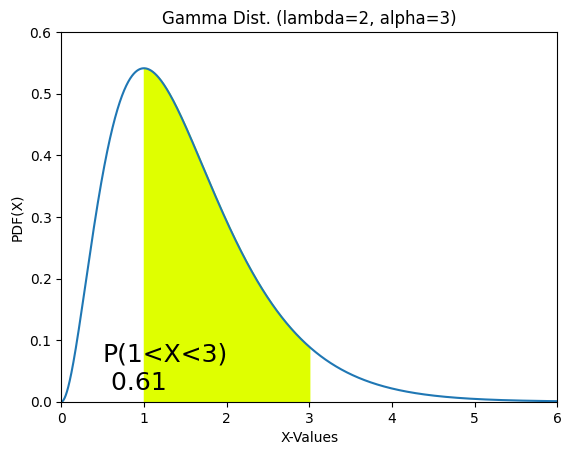

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 6, 0.001)
ax.plot(x, gamma.pdf(x, a = alpha, scale = 1/lam))
ax.set_title(f'Gamma Dist. (lambda={lam}, alpha={alpha})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 6)
ax.fill_between(px, gamma.pdf(px, a = alpha, scale = 1/lam), color='#DFFF00')

prob = gamma.cdf(Y, a = alpha, scale = 1/lam) - gamma.cdf(X, a = alpha, scale = 1/lam)
ax.text(0.5, 0.02, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);

#Reading Resources

[Statistical Aid](https://www.statisticalaid.com/gamma-distribution-definition-formula-and-applications/#google_vignette)

[Statisticshowto](https://www.statisticshowto.com/gamma-distribution/)

[Probability - Gamma Distribution](https://bookdown.org/mpfoley1973/probability/gamma.html)

[Great Learning](https://www.mygreatlearning.com/blog/gamma-distribution/)

[Builtin](https://builtin.com/data-science/gamma-distribution)

[LibreTexts](https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/05%3A_Special_Distributions/5.08%3A_The_Gamma_Distribution)

[SciPy Docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html)

[Springer Reference](https://link.springer.com/referenceworkentry/10.1007/978-0-387-32833-1_157)

##Beta Distribution

The Beta distribution is commonly used to model random variables that represent probabilities or proportions. It's a continuous probability distribution defined on the interval [0, 1].The PDF of the beta distribution can be defined, generally, as:

 >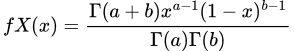

Where;

`x` is a random variable that can take on values between 0 and 1 (`0 <= x <= 1`)


`a` is a shape parameter which is often associated with the probability of success or the number of successes in a sequence of Bernoulli trials. Higher values of `a` result in a distribution that assigns more weight to higher probabilities. `(a > 0)`,


`b` is the non-negative second shape parameter `(b > 0)`. It also influences the shape and behavior of the distribution. Similar to `a`, it's linked to the probability of failure or the number of failures in a sequence of Bernoulli trials. Higher values of β will lead to a distribution that assigns more weight to lower probabilities.




`Γ()` is the [gamma function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html#scipy.special.gamma)


The code below is used to illustrate the effect of different `a` and `b(β)` values

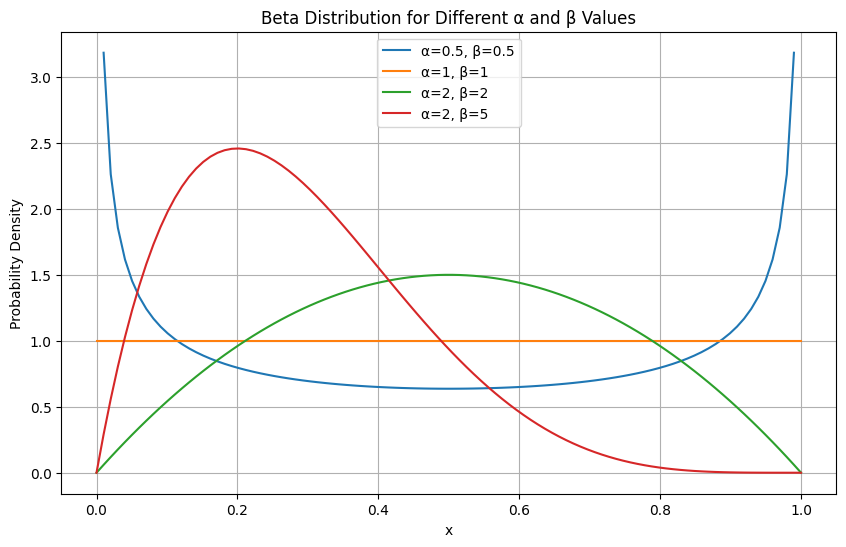

In [ ]:


# Parameters for the Beta distribution
alpha_values = [0.5, 1, 2, 2]
beta_values = [0.5, 1, 2, 5]
x = np.linspace(0, 1, 100)

# Plotting the Beta distribution for different parameter values
plt.figure(figsize=(10, 6))
for a, b in zip(alpha_values, beta_values):
    pdf = beta.pdf(x, a, b)
    plt.plot(x, pdf, label=f'α={a}, β={b}')

plt.title('Beta Distribution for Different α and β Values')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()


#How are the values of `a` and `b` derived?

Suppose you are modeling the probability of success in a series of trials, such as the success rate of a new drug curing a disease based on historical data. Let's say you have observed 70 successes out of 100 trials.



In [ ]:
# Observed data
successes = 70
total_trials = 100

We can use the method of moments or maximum likelihood estimation to estimate the parameters
α and β based on the observed successes and failures:

In [ ]:
# Method of moments estimation
alpha_estimated = successes
beta_estimated = total_trials - successes

# Display estimated values
print(f"Estimated alpha: {alpha_estimated}")
print(f"Estimated beta: {beta_estimated}")

Estimated alpha: 70
Estimated beta: 30


We can then use these parameters to generate random numbers that follow a beta distribution:


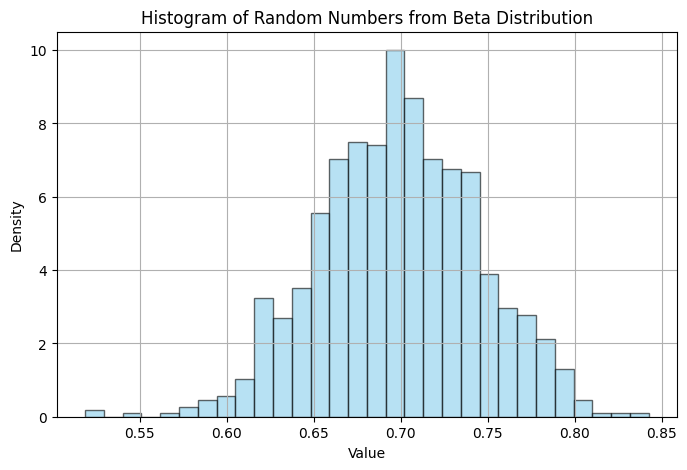

In [ ]:
# Generate random numbers from the Beta distribution
random_numbers = beta.rvs(alpha_estimated, beta_estimated, size=1000)

#Plotting the histogram of the generated random numbers
plt.figure(figsize=(8, 5))
plt.hist(random_numbers, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Random Numbers from Beta Distribution')
plt.grid(True)
plt.show()


Note the concentration of values around 70.


The PDF(plotted below) represents the probability density for the success rate of the treatment. The high peak at 0.7 implies that according to the estimated parameters, this success rate has a higher probability density compared to other success rates within the [0, 1] interval



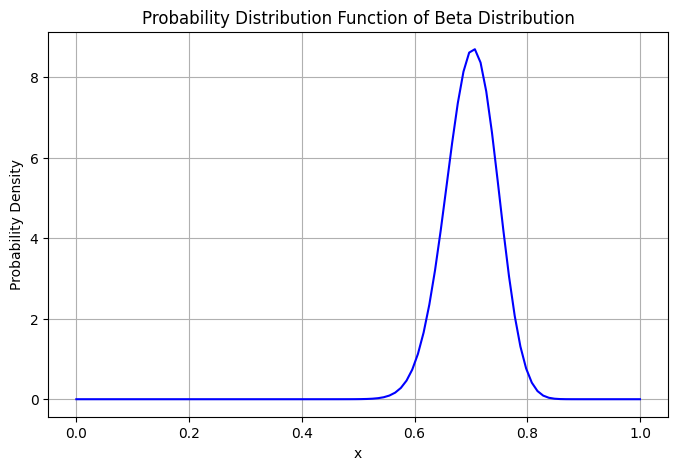

In [ ]:
import numpy as np

# Generate x values for the PDF plot
x = np.linspace(0, 1, 100)
pdf = beta.pdf(x, alpha_estimated, beta_estimated)

# Plotting the probability distribution function (PDF) of the Beta distribution
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, color='blue')

# Add labels and title
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Function of Beta Distribution')
plt.grid(True)
plt.show()


# The Cumulative Distribution Function



Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

In [ ]:
np.random.seed(1)
N = 1000000
a = 2
b = 10

beta_data = np.random.beta(a = a, b = b, size = N)
#Fit a beta distribution to the data and get the parameters
params = beta.fit(beta_data)
params
print('a = ', params[0], ',', 'b = ', params[1], ',', 'loc = ', params[2], ',', 'scale = ', params[3])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


a =  2.000291137531903 , b =  9.98671415801262 , loc =  7.581153750419586e-06 , scale =  0.9986098816575184


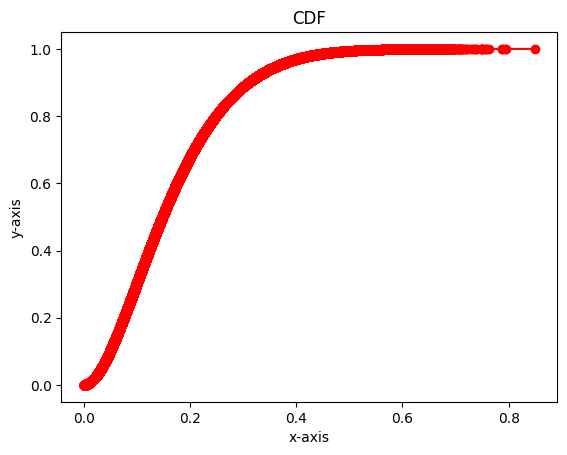

In [ ]:
x = np.sort(beta_data)
N = 1000000
#Get the cdf values of y
y = np.arange(N) / float(N)

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o');


To find a point that has a right probability of
 use:

>` beta.isf(p, a, b)`

To find a point that has a left probability of
 use the code below:

>` beta.isf(1-p, a, b)`



In [ ]:
p = 0.7
a = 2
b = 10
print(f'The point in the Beta(a={a}, b={b}) Distribution that has a right probability of *{p}*: ', beta.isf(p, a = a, b = b))
print(f'The point in the Beta(a={a}, b={b}) Distribution that has a left probability of *{p}*: ', beta.isf(1-p, a = a, b = b))

The point in the Beta(a=2, b=10) Distribution that has a right probability of *0.7*:  0.09937978155154288
The point in the Beta(a=2, b=10) Distribution that has a left probability of *0.7*:  0.20767611743114214


To find the left probability of a point use the code below:


` beta.cdf(X, a, b) `

To find the right probability of a point use the code below:

`beta.sf(X, a, b)`

In [ ]:
X = 0.2
a = 2
b = 10
print(f'The left probability of *{X}* in the Beta(a={a}, b={b}) Distribution is: ', beta.cdf(X, a = a, b = b))
print(f'The Right probability of *{X}* in the Beta(a={a}, b={b}) Distribution is: ', beta.sf(X, a = a, b = b))

The left probability of *0.2* in the Beta(a=2, b=10) Distribution is:  0.6778774527999998
The Right probability of *0.2* in the Beta(a=2, b=10) Distribution is:  0.32212254720000016


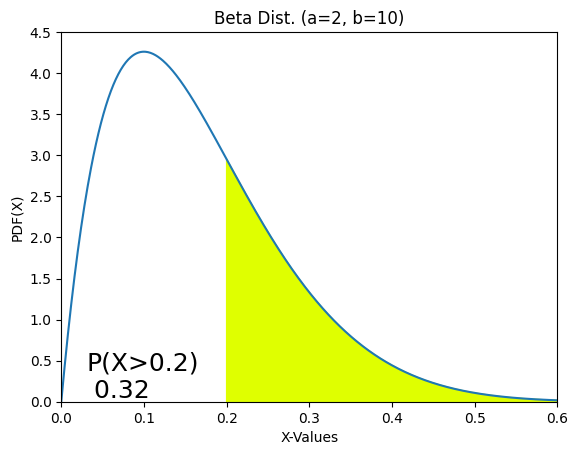

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 0.6, 0.001)
ax.plot(x, beta.pdf(x, a, b))
ax.set_title(f'Beta Dist. (a={a}, b={b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(X, 6, 0.001)
ax.set_ylim(0, 4.5)
ax.set_xlim(0, 0.6)
ax.fill_between(px, beta.pdf(px, a, b), color='#DFFF00')

prob = beta.sf(X, a, b)
ax.text(0.03, 0.05, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);


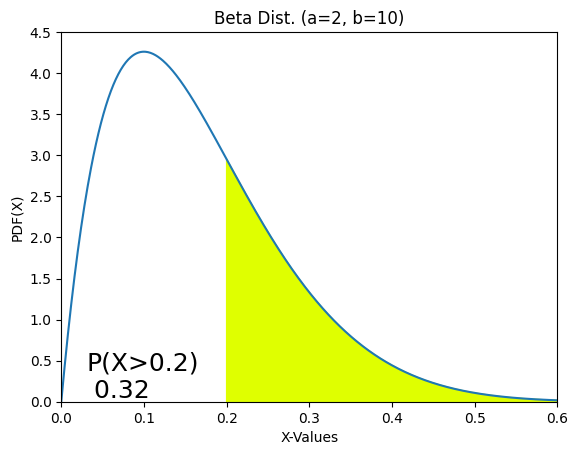

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 0.6, 0.001)
ax.plot(x, beta.pdf(x, a, b))
ax.set_title(f'Beta Dist. (a={a}, b={b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(X, 6, 0.001)
ax.set_ylim(0, 4.5)
ax.set_xlim(0, 0.6)
ax.fill_between(px, beta.pdf(px, a, b), color='#DFFF00')

prob = beta.sf(X, a, b)
ax.text(0.03, 0.05, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);


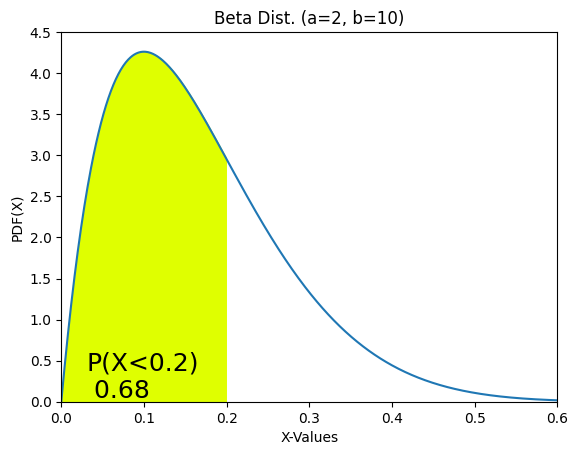

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 0.6, 0.001)
ax.plot(x, beta.pdf(x, a, b))
ax.set_title(f'Beta Dist. (a={a}, b={b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(0, X, 0.001)
ax.set_ylim(0, 4.5)
ax.set_xlim(0, 0.6)
ax.fill_between(px, beta.pdf(px, a, b), color='#DFFF00')

prob = beta.cdf(X, a, b)
ax.text(0.03, 0.05, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points use the code below:

` beta.cdf(Y, a, scale) - beta.cdf(X, a, scale) `



In [ ]:
X = 0.1
Y = 0.2
a = 2
b = 10
print(f'The probability between *({X}, {Y})* in the Beta(a={a}, b={b}) Distribution is: ', beta.cdf(Y, a, b) - beta.cdf(X, a, b))

The probability between *(0.1, 0.2)* in the Beta(a=2, b=10) Distribution is:  0.37523433299999975


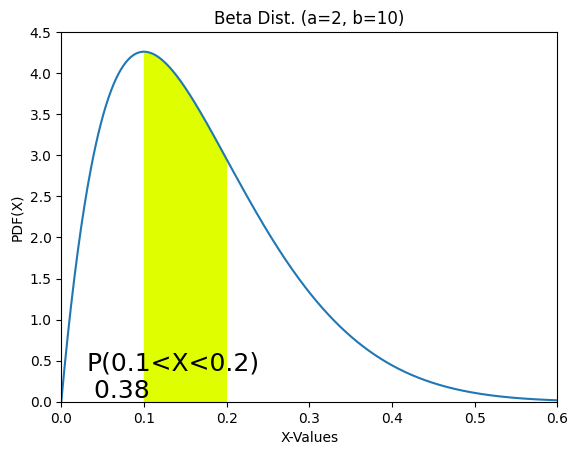

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 0.6, 0.001)
ax.plot(x, beta.pdf(x, a, b))
ax.set_title(f'Beta Dist. (a={a}, b={b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(0, 4.5)
ax.set_xlim(0, 0.6)
ax.fill_between(px, beta.pdf(px, a, b), color='#DFFF00')

prob = beta.cdf(Y, a, b) - beta.cdf(X, a, b)
ax.text(0.03, 0.05, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);

>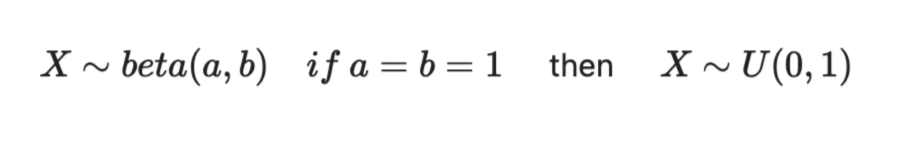

#Additional Reading


[Stanford CS109 - Beta Distribution](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/pdfs/22%20Beta.pdf)

[Stat 414 - Penn State](https://online.stat.psu.edu/stat414/lesson/23/23.2)

[Testbook](https://testbook.com/maths/beta-distribution)

[R Documentation](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/Beta)

[DeepAI](https://deepai.org/machine-learning-glossary-and-terms/beta-distribution)

[Mathlets - Beta Distribution](https://mathlets.org/mathlets/beta-distribution/)

[Northern Kentucky University](https://www.nku.edu/~longa/Rweb/library/base/html/Beta.html)


[Introducing the Beta Distribution](https://jmsallan.netlify.app/blog/introducing-the-beta-distribution/)


# Weibull distribution


The Weibull distribution is a continuous probability distribution that is often used to model the time until an event occurs. It is particularly useful in reliability engineering, survival analysis, and failure analysis. Some key characteristics of the weibull distribution are:


1. **Shape Parameter (k):**
   - The shape parameter, denoted by `k`, determines the shape of the distribution.
   - When `k > 1`, the distribution is skewed to the right (increasing hazard rate), indicating that the failure rate increases over time.

   - When `k < 1`, the distribution is skewed to the left (decreasing hazard rate), indicating that the failure rate decreases over time.

   - When `k = 1`, the distribution is exponential, representing constant hazard rate.

2. **Scale Parameter (λ):**
   - The scale parameter, denoted by `λ`, determines the scale or spread of the distribution.
   
   - It influences the average or characteristic life of the distribution.




#PDF

The PDF of the webull distribution can be formally defined as:

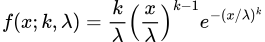

In [ ]:
from scipy.stats import weibull_min


where;

- `x` is the time variable.
- `k` is the scale parameter
- `λ` is the location parameter


Integration of the PDF gives the following CDF


lagrida_latex_editor-10.png

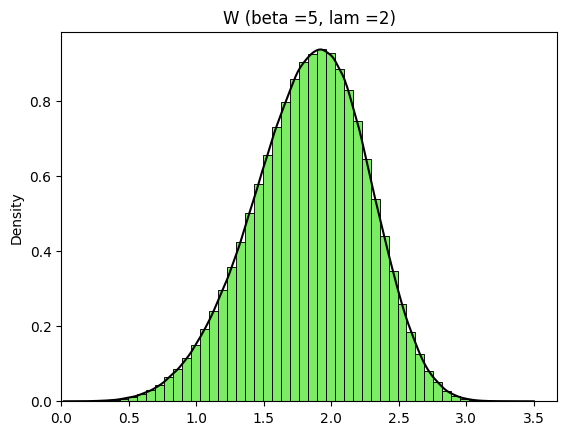

In [ ]:
np.random.seed(1)
N = 1000000
bet, lam = [5, 2]

wei_data = weibull_min.rvs(bet, loc=0, scale=lam, size=N)

sns.histplot(wei_data, color='#4fe630', stat='density', bins=50)
sns.kdeplot(wei_data, color='black')
plt.xlim(left = 0)
plt.title(f'W (beta ={bet}, lam ={lam})');

In [ ]:
bet, lam = [5, 2]
print(f'The mean of the W(beta={bet}, lam={lam}) Distribution is: ', np.round(weibull_min.mean(bet, scale=lam), 4))
print(f'The median of the W(beta={bet}, lam={lam}) Distribution is: ', np.round(weibull_min.median(bet, scale=lam), 4))
print(f'The variance of the W(beta={bet}, lam={lam}) Distribution is: ', np.round(weibull_min.var(bet, scale=lam), 4))
print(f'The standard deviation of the W(beta={bet}, lam={lam}) Distribution is: ', np.round(weibull_min.std(bet, scale=lam), 4))
print(f'The skewness of the W(beta={bet}, lam={lam}) Distribution is: ', np.round(weibull_min.stats(bet, scale=lam, moments='mvsk')[2], 4))
print(f'The kurtosis of the W(beta={bet}, lam={lam}) Distribution is: ', np.round(weibull_min.stats(bet, scale=lam, moments='mvsk')[3], 4))

The mean of the W(beta=5, lam=2) Distribution is:  1.8363
The median of the W(beta=5, lam=2) Distribution is:  1.8586
The variance of the W(beta=5, lam=2) Distribution is:  0.1769
The standard deviation of the W(beta=5, lam=2) Distribution is:  0.4206
The skewness of the W(beta=5, lam=2) Distribution is:  -0.2541
The kurtosis of the W(beta=5, lam=2) Distribution is:  -0.1197


In [ ]:
#Fit a weibull distribution to the data and get the parameters
params = weibull_min.fit(wei_data)
print('beta = ', params[0], ',', 'lam = ', params[2], ',','loc = ', params[1])

beta =  4.991260609165898 , lam =  1.9952614193960059 , loc =  0.004516777285024783


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:2441: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


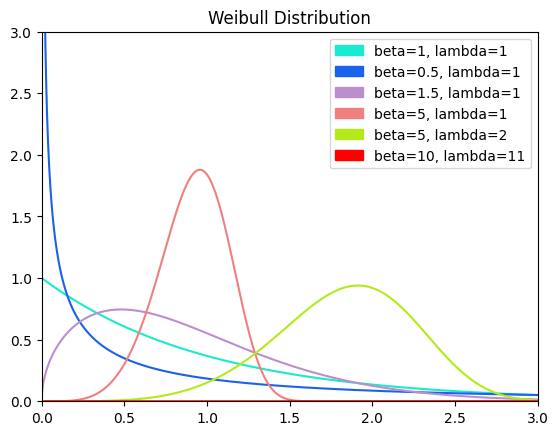

In [ ]:
np.random.seed(1)
N = 100000
x = np.linspace(0, 3, N)
b1, b2, b3, b4, b5, b6 = [1, 0.5, 1.5, 5, 5, 10]
lam1, lam2, lam3, lam4, lam5, lam6 = [1, 1, 1, 1, 2, 11]

wei_data1 = weibull_min.pdf(x, b1, scale = lam1)
wei_data2 = weibull_min.pdf(x, b2, scale = lam2)
wei_data3 = weibull_min.pdf(x, b3, scale = lam3)
wei_data4 = weibull_min.pdf(x, b4, scale = lam4)
wei_data5 = weibull_min.pdf(x, b5, scale = lam5)
wei_data6 = weibull_min.pdf(x, b6, scale = lam6)

plt.plot(x, wei_data1, color='#1AEACD')
plt.plot(x, wei_data2, color='#1A62EA')
plt.plot(x, wei_data3, color='#BB8FCE')
plt.plot(x, wei_data4, color='LightCoral')
plt.plot(x, wei_data5, color='#B4EA1A')
plt.plot(x, wei_data6, color='r')

patch1 = mpatches.Patch(color='#1AEACD', label=f'beta={b1}, lambda={lam1}')
patch2 = mpatches.Patch(color='#1A62EA', label=f'beta={b2}, lambda={lam2}')
patch3 = mpatches.Patch(color='#BB8FCE', label=f'beta={b3}, lambda={lam3}')
patch4 = mpatches.Patch(color='LightCoral', label=f'beta={b4}, lambda={lam4}')
patch5 = mpatches.Patch(color='#B4EA1A', label=f'beta={b5}, lambda={lam5}')
patch6 = mpatches.Patch(color='r', label=f'beta={b6}, lambda={lam6}')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], frameon=True);
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.title('Weibull Distribution');

To find a point that has a right probability of
 use the code below:

` weibull_min.isf(p, bet, scale = lam)`

To find a point that has a left probability of
 use the code below:

` weibull_min.isf(1-p, bet, scale = lam) `

In [ ]:
p = 0.7
bet, lam = [5, 2]
print(f'The point in the W(beta={bet}, lam={lam}) Distribution that has a right probability of *{p}*: ', weibull_min.isf(p, bet, scale = lam))
print(f'The point in the W(beta={bet}, lam={lam}) Distribution that has a left probability of *{p}*: ', weibull_min.isf(1-p, bet, scale = lam))


The point in the W(beta=5, lam=2) Distribution that has a right probability of *0.7*:  1.6273632938337603
The point in the W(beta=5, lam=2) Distribution that has a left probability of *0.7*:  2.0756462113012253


To find the left probability of a point use the code below:

` weibull_min.cdf(X, bet, scale = lam)`

To find the right probability of a point use the code below:

` weibull_min.sf(X, bet, scale = lam)`

In [ ]:
X = 1.5
bet, lam = [5, 2]
print(f'The left probability of *{X}* in the W(beta={bet}, lam={lam}) Distribution is: ', weibull_min.cdf(X, bet, scale = lam))
print(f'The Right probability of *{X}* in the W(beta={bet}, lam={lam}) Distribution is: ', weibull_min.sf(X, bet, scale = lam))

The left probability of *1.5* in the W(beta=5, lam=2) Distribution is:  0.2112490711463823
The Right probability of *1.5* in the W(beta=5, lam=2) Distribution is:  0.7887509288536177


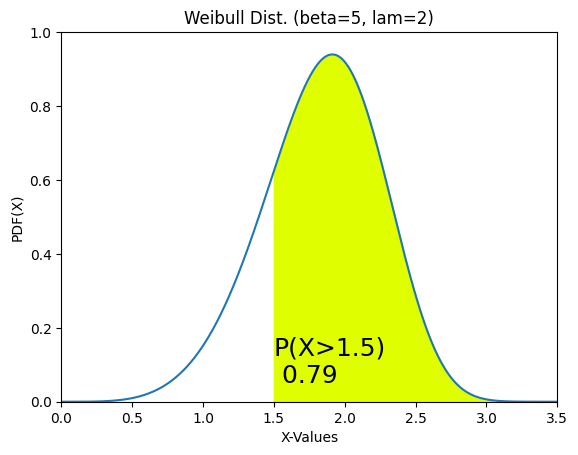

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 3.5, 0.001)
ax.plot(x, weibull_min.pdf(x, bet, scale = lam))
ax.set_title(f'Weibull Dist. (beta={bet}, lam={lam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(X, 3.5, 0.001)
ax.set_ylim(0, 1)
ax.set_xlim(0, 3.5)
ax.fill_between(px, weibull_min.pdf(px, bet, scale = lam), color='#DFFF00')

prob = weibull_min.sf(X, bet, scale = lam)
ax.text(1.5, 0.05, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);


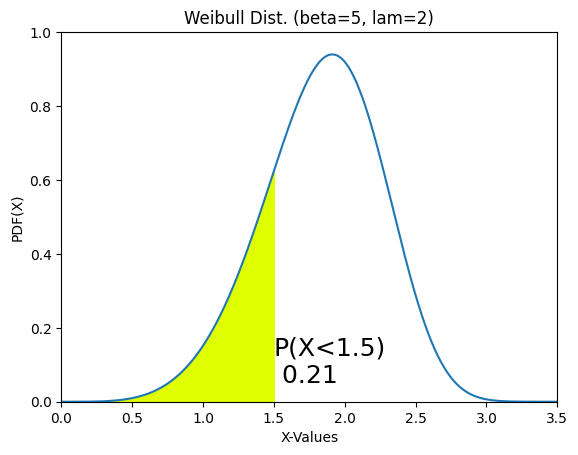

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 3.5, 0.001)
ax.plot(x, weibull_min.pdf(x, bet, scale = lam))
ax.set_title(f'Weibull Dist. (beta={bet}, lam={lam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(0, X, 0.001)
ax.set_ylim(0, 1)
ax.set_xlim(0, 3.5)
ax.fill_between(px, weibull_min.pdf(px, bet, scale = lam), color='#DFFF00')

prob = weibull_min.cdf(X, bet, scale = lam)
ax.text(1.5, 0.05, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);


To find the probability between two points use the code below:

`weibull_min.cdf(Y, bet, scale = lam) - weibull_min.cdf(X, bet, scale = lam) `



In [ ]:
X = 1.5
Y = 2.5
bet, lam = [5, 2]
print(f'The probability between *({X}, {Y})* in the W(beta={bet}, lam={lam}) Distribution is: ', weibull_min.cdf(Y, bet, scale = lam) - weibull_min.cdf(X, bet, scale = lam))


The probability between *(1.5, 2.5)* in the W(beta=5, lam=2) Distribution is:  0.7414751794473271


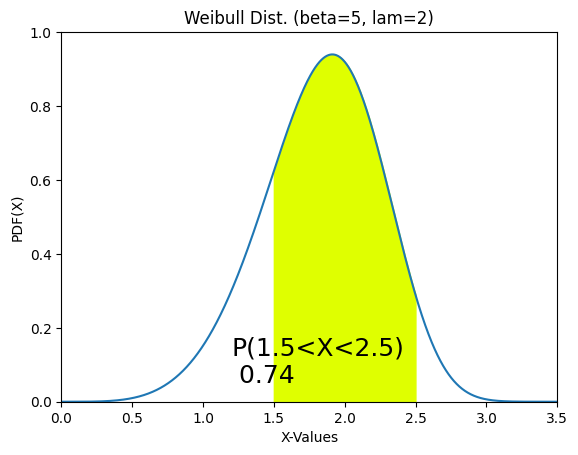

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(0, 3.5, 0.001)
ax.plot(x, weibull_min.pdf(x, bet, scale = lam))
ax.set_title(f'Weibull Dist. (beta={bet}, lam={lam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(0, 1)
ax.set_xlim(0, 3.5)
ax.fill_between(px, weibull_min.pdf(px, bet, scale = lam), color='#DFFF00')

prob = weibull_min.cdf(Y, bet, scale = lam) - weibull_min.cdf(X, bet, scale = lam)
ax.text(1.2, 0.05, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);

>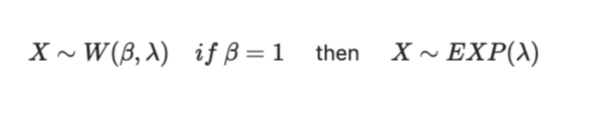

#Additional Reading

[University of Iowa](https://user.engineering.uiowa.edu/~dbricker/active%20learning%20cases/Stochastic/Weibull_tables.PDF)

[Electronics Cooling](https://www.electronics-cooling.com/2023/01/statistics-corner-weibull-distribution/)

[Distribution Explorer](https://distribution-explorer.github.io/continuous/weibull.html)

[Ellistat](https://ellistat.com/en/user-guide/weibull-distribution)

[Routledge](https://www.routledge.com/The-Weibull-Distribution-A-Handbook/Rinne/p/book/9780367577469)

[All About Circuits](https://www.allaboutcircuits.com/technical-articles/how-the-Weibull-distribution-is-used-in-reliability-engineering/)

[Hindawi Journals ](https://www.hindawi.com/journals/complexity/2022/4068842/)

# Cauchy Distribution

The cauchy distribution is a continuous probability distribution that is characterised by its heavy tails and the fact that it has an undefined mean and variance. The PDF of the Cauchy distribution is given by:

>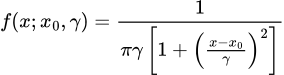

Where;

`𝓧0` is the location parameter (the median)

`γ` is the scale parameter



`E(X) = undefined`
`Var(X) = Undefined`
`median(X) = 0 `


Note: The distribution is symmetric about its median.

If `𝓧0 = 0`, and `γ = 1` the probability distribution is called a standard cauchy distribution

The Cauchy distribution has tails that do not converge to zero as quickly as the normal distribution. This makes it less suitable for applications where outliers should be minimized; the heavy tails of the cauchy distribution make it unsuitable for scenarios requiring stable estimations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy

# Set parameters
x0 = 0  # location parameter
gamma = 1  # scale parameter


In [2]:
cauchy_data =cauchy.rvs(loc = 0, scale=gamma, size=1000)

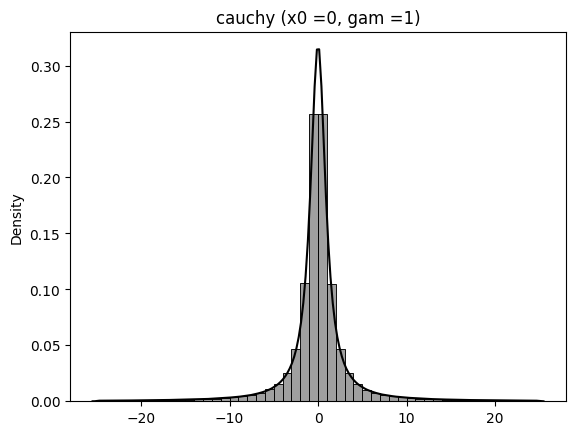

In [7]:
np.random.seed(1)
N = 10000000
x0, gam = [0, 1]

cau_data = np.random.standard_cauchy(size = N)
cau_data = cau_data[(cau_data>-25) & (cau_data<25)]
sns.histplot(cau_data, color='gray', stat='density', bins=50)
sns.kdeplot(cau_data, color='black')
plt.title(f'cauchy (x0 ={x0}, gam ={gam})');


In [8]:
x0, gam = [0, 1]
print(f'The mean of the Cauchy(x0={x0}, gam={gam}) Distribution is: ', np.round(cauchy.mean(loc=0, scale=1), 4))
print(f'The median of the Cauchy(x0={x0}, gam={gam}) Distribution is: ', np.round(cauchy.median(loc=0, scale=1), 4))
print(f'The variance of the Cauchy(x0={x0}, gam={gam}) Distribution is: ', np.round(cauchy.var(loc=0, scale=1), 4))
print(f'The standard deviation of the Cauchy(x0={x0}, gam={gam}) Distribution is: ', np.round(cauchy.std(loc=0, scale=1), 4))
print(f'The skewness of the Cauchy(x0={x0}, gam={gam}) Distribution is: ', np.round(cauchy.stats(loc=0, scale=1, moments='mvsk')[2], 4))
print(f'The kurtosis of the Cauchy(x0={x0}, gam={gam}) Distribution is: ', np.round(cauchy.stats(loc=0, scale=1, moments='mvsk')[3], 4))


The mean of the Cauchy(x0=0, gam=1) Distribution is:  nan
The median of the Cauchy(x0=0, gam=1) Distribution is:  0.0
The variance of the Cauchy(x0=0, gam=1) Distribution is:  nan
The standard deviation of the Cauchy(x0=0, gam=1) Distribution is:  nan
The skewness of the Cauchy(x0=0, gam=1) Distribution is:  nan
The kurtosis of the Cauchy(x0=0, gam=1) Distribution is:  nan


In [9]:
#Fit a cauchy distribution to the data and get the parameters
params = cauchy.fit(cau_data)
print('loc = ', params[0], ',', 'gam = ', params[1])


loc =  -0.0008540357173467919 , gam =  0.9508218438117712


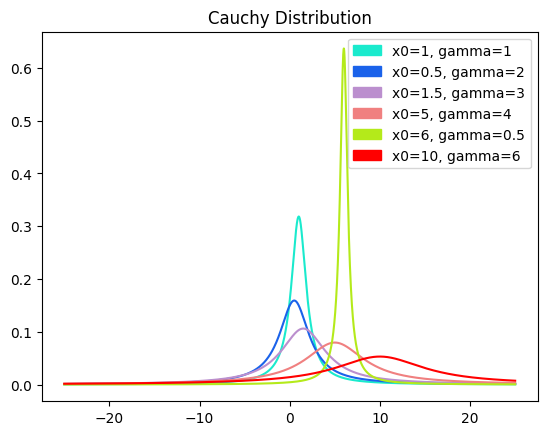

In [10]:
np.random.seed(1)
N = 100000
x = np.linspace(-25, 25, N)
x1, x2, x3, x4, x5, x6 = [1, 0.5, 1.5, 5, 6, 10]
gam1, gam2, gam3, gam4, gam5, gam6 = [1, 2, 3, 4, 0.5, 6]

cau_data1 = cauchy.pdf(x, loc = x1, scale = gam1)
cau_data2 = cauchy.pdf(x, loc = x2, scale = gam2)
cau_data3 = cauchy.pdf(x, loc = x3, scale = gam3)
cau_data4 = cauchy.pdf(x, loc = x4, scale = gam4)
cau_data5 = cauchy.pdf(x, loc = x5, scale = gam5)
cau_data6 = cauchy.pdf(x, loc = x6, scale = gam6)

plt.plot(x, cau_data1, color='#1AEACD')
plt.plot(x, cau_data2, color='#1A62EA')
plt.plot(x, cau_data3, color='#BB8FCE')
plt.plot(x, cau_data4, color='LightCoral')
plt.plot(x, cau_data5, color='#B4EA1A')
plt.plot(x, cau_data6, color='r')

patch1 = mpatches.Patch(color='#1AEACD', label=f'x0={x1}, gamma={gam1}')
patch2 = mpatches.Patch(color='#1A62EA', label=f'x0={x2}, gamma={gam2}')
patch3 = mpatches.Patch(color='#BB8FCE', label=f'x0={x3}, gamma={gam3}')
patch4 = mpatches.Patch(color='LightCoral', label=f'x0={x4}, gamma={gam4}')
patch5 = mpatches.Patch(color='#B4EA1A', label=f'x0={x5}, gamma={gam5}')
patch6 = mpatches.Patch(color='r', label=f'x0={x6}, gamma={gam6}')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], frameon=True);
#plt.xlim(0, 3)
#plt.ylim(0, 3)
plt.title('Cauchy Distribution');

To find a point that has a right probability of
 use the code below:

`cauchy.isf(p, loc = x0, scale = gamma) `

To find a point that has a left probability of
 use the code below:

` cauchy.isf(1-p, loc = x0, scale = gamma)`

In [13]:
p = 0.7
x0, gam = [0, 1]
print(f'The point in the Cauchy(x0={x0}, gam={gam}) Distribution that has a right probability of *{p}*: ', cauchy.isf(p, loc = x0, scale = gam))
print(f'The point in the Cauchy(x0={x0}, gam={gam}) Distribution that has a left probability of *{p}*: ', cauchy.isf(1-p, loc = x0, scale = gam))

The point in the Cauchy(x0=0, gam=1) Distribution that has a right probability of *0.7*:  -0.7265425280053609
The point in the Cauchy(x0=0, gam=1) Distribution that has a left probability of *0.7*:  0.7265425280053607


To find the left probability of a point use:

` cauchy.cdf(X, loc = x0, scale = gamma) `

To find the right probability of a point use:

` cauchy.sf(X, loc = x0, scale = gamma) `

In [14]:
X = 0.5
x0, gam = [0, 1]
print(f'The left probability of *{X}* in the Cauchy(x0={x0}, gam={gam}) Distribution is: ', cauchy.cdf(X, loc = x0, scale = gam))
print(f'The Right probability of *{X}* in the Cauchy(x0={x0}, gam={gam}) Distribution is: ', cauchy.sf(X, loc = x0, scale = gam))

The left probability of *0.5* in the Cauchy(x0=0, gam=1) Distribution is:  0.6475836176504333
The Right probability of *0.5* in the Cauchy(x0=0, gam=1) Distribution is:  0.35241638234956674


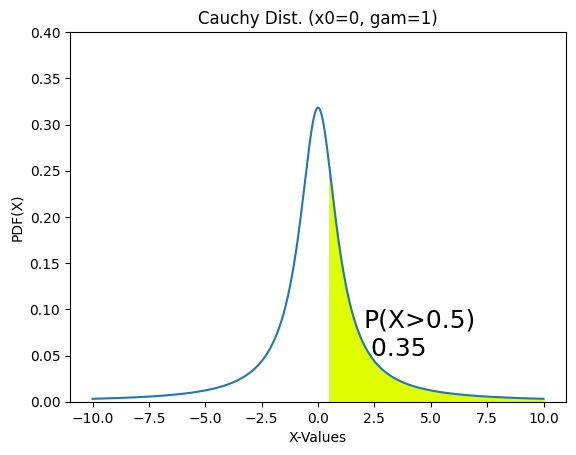

In [15]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(-10, 10, 0.001)
ax.plot(x, cauchy.pdf(x, loc = x0, scale = gam))
ax.set_title(f'Cauchy Dist. (x0={x0}, gam={gam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(X, 10, 0.001)
ax.set_ylim(0, 0.4)
ax.fill_between(px, cauchy.pdf(px, loc = x0, scale = gam), color='#DFFF00')

prob = cauchy.sf(X, loc = x0, scale = gam)
ax.text(2, 0.05, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);


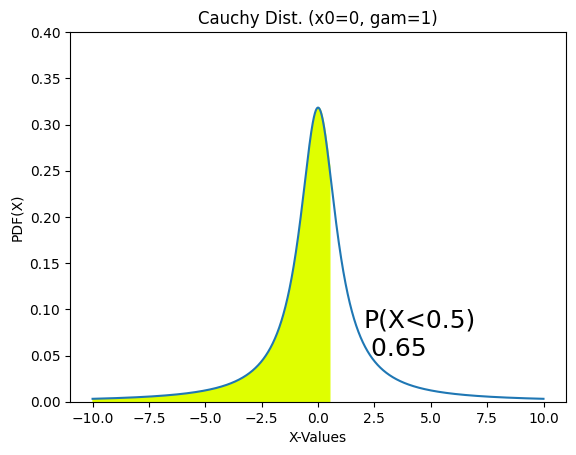

In [16]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(-10, 10, 0.001)
ax.plot(x, cauchy.pdf(x, loc = x0, scale = gam))
ax.set_title(f'Cauchy Dist. (x0={x0}, gam={gam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(-10, X, 0.001)
ax.set_ylim(0, 0.4)
ax.fill_between(px, cauchy.pdf(px, loc = x0, scale = gam), color='#DFFF00')

prob = cauchy.cdf(X, loc = x0, scale = gam)
ax.text(2, 0.05, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);


To find the probability between two points use the code below:

` cauchy.cdf(Y, loc = x0, scale = gamma) - cauchy.cdf(X, loc = x0, scale = gamma) `

In [18]:
X = 0
Y = 1
x0, gam = [0, 1]
print(f'The probability between *({X}, {Y})* in the Cauchy(x0={x0}, gam={gam}) Distribution is: ', cauchy.cdf(Y, loc = x0, scale = gam) - cauchy.cdf(X, loc = x0, scale = gam))

The probability between *(0, 1)* in the Cauchy(x0=0, gam=1) Distribution is:  0.25


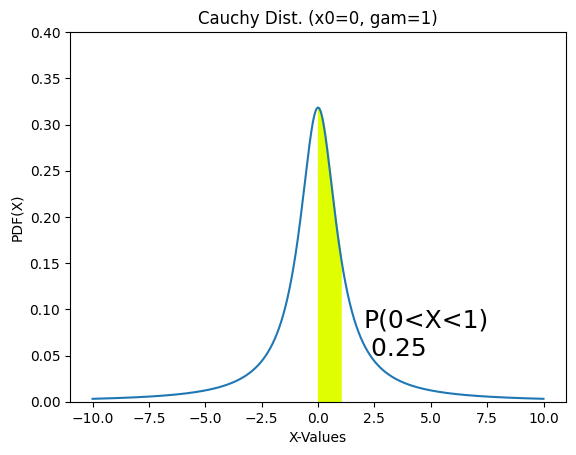

In [19]:
fig, ax = plt.subplots()
#Distribution curve
x = np.arange(-10, 10, 0.001)
ax.plot(x, cauchy.pdf(x, loc = x0, scale = gam))
ax.set_title(f'Cauchy Dist. (x0={x0}, gam={gam})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(0, 0.4)
ax.fill_between(px, cauchy.pdf(px, loc = x0, scale = gam), color='#DFFF00')

prob = cauchy.cdf(Y, loc = x0, scale = gam) - cauchy.cdf(X, loc = x0, scale = gam)
ax.text(2, 0.05, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);


#Additional Reading

1. **Caltech - Comparison of Cauchy vs Gaussian Distribution:**
   [https://web.ipac.caltech.edu/staff/fmasci/home/mystats/CauchyVsGaussian.pdf](https://web.ipac.caltech.edu/staff/fmasci/home/mystats/CauchyVsGaussian.pdf)

2. **LibreTexts - The Cauchy Distribution:**
   [https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/05%3A_Special_Distributions/5.32%3A_The_Cauchy_Distribution](https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/05%3A_Special_Distributions/5.32%3A_The_Cauchy_Distribution)

3. **MIT Urban Operations Research - Understanding the Cauchy Distribution:**
   [https://web.mit.edu/urban_or_book/www/book/chapter3/3.3.3.html](https://web.mit.edu/urban_or_book/www/book/chapter3/3.3.3.html)

4. **William & Mary - Standard Cauchy Distribution:**
   [https://www.math.wm.edu/~leemis/chart/UDR/PDFs/Standardcauchy.pdf](https://www.math.wm.edu/~leemis/chart/UDR/PDFs/Standardcauchy.pdf)

5. **Oxford Reference - Cauchy Distribution Entry:**
   [https://www.oxfordreference.com/display/10.1093/oi/authority.20110803095555727](https://www.oxfordreference.com/display/10.1093/oi/authority.20110803095555727)

6. **Towards Data Science - The Cauchy Distribution: Your Distribution So Fat:**
   [https://towardsdatascience.com/the-cauchy-distribution-your-distribution-so-fat-877c2cbad46d](https://towardsdatascience.com/the-cauchy-distribution-your-distribution-so-fat-877c2cbad46d)

7. **Wikiwand - Cauchy Distribution Overview:**
   [https://www.wikiwand.com/en/Cauchy_distribution](https://www.wikiwand.com/en/Cauchy_distribution)


